# Data Science Master Degree Capstone Project

## Dataset : Chest X-Ray

## Harmankaranjit Singh Lohiya

## QO38890

In [1]:
# Importing necessary libraries

import os
import cv2
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Creating Path to the dataset 

pneumonia_path = r"C:\Users\Karan's\Desktop\Project files\Dataset\PNEUMONIA"
normal_path = r"C:\Users\Karan's\Desktop\Project files\Dataset\NORMAL"

# Loading the images from the dataset

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

pneumonia_images = load_images_from_folder(pneumonia_path)
normal_images = load_images_from_folder(normal_path)

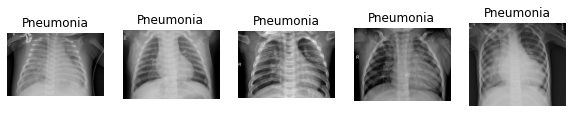

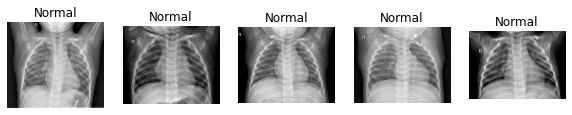

In [3]:
# Displaying some sample images from the dataset

def display_images(images, title):
    plt.figure(figsize=(10,5))
    for i in range(5):  # displaying 5 images from Pneumonia & Normal
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i], 'gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

display_images(pneumonia_images, "Pneumonia")
display_images(normal_images, "Normal")

In [4]:
# Generating some basic statistics

pneumonia_img_shapes = [img.shape for img in pneumonia_images]
normal_img_shapes = [img.shape for img in normal_images]

print(f"Average size of pneumonia images: {np.mean(pneumonia_img_shapes, axis=0)}")
print(f"Average size of normal images: {np.mean(normal_img_shapes, axis=0)}")

Average size of pneumonia images: [ 868.33066132 1255.70541082]
Average size of normal images: [1350.21587302 1665.13015873]


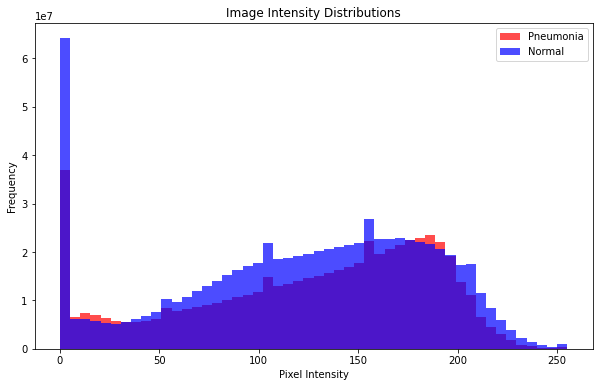

In [5]:
# Image intensity distributions

def plot_intensity_distribution(images, title, color):
    intensities = [img.ravel() for img in images]
    all_intensities = np.concatenate(intensities)
    plt.hist(all_intensities, bins=50, color=color, alpha=0.7, label=title)

plt.figure(figsize=(10,6))
plot_intensity_distribution(pneumonia_images, "Pneumonia", color='red')
plot_intensity_distribution(normal_images, "Normal", color='blue')
plt.legend()
plt.title("Image Intensity Distributions")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [6]:
# CNN Model 

# Loading and preprocessing the images
def load_images_from_folder(folder, label):
    data = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            resized_img = cv2.resize(img, (128, 128))
            data.append([resized_img, label])
    return data

In [7]:
# Paths to the datasets
pneumonia_path = r"C:\Users\Karan's\Desktop\Project files\Dataset\PNEUMONIA"
normal_path = r"C:\Users\Karan's\Desktop\Project files\Dataset\NORMAL"

pneumonia_data = load_images_from_folder(pneumonia_path, 1)
normal_data = load_images_from_folder(normal_path, 0)

In [8]:
# Combining and shuffling the data
all_data = pneumonia_data + normal_data
np.random.shuffle(all_data)

X = []
y = []

for features, label in all_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, 128, 128, 1)
y = np.array(y)

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# Building the CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [12]:
# Training the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
21/21 [==============================] - 5s 224ms/step - loss: 0.6719 - accuracy: 0.6006 - val_loss: 0.6318 - val_accuracy: 0.6564
Epoch 2/10
21/21 [==============================] - 5s 232ms/step - loss: 0.6460 - accuracy: 0.6114 - val_loss: 0.5907 - val_accuracy: 0.6564
Epoch 3/10
21/21 [==============================] - 4s 213ms/step - loss: 0.5959 - accuracy: 0.6790 - val_loss: 0.5294 - val_accuracy: 0.8712
Epoch 4/10
21/21 [==============================] - 4s 213ms/step - loss: 0.4914 - accuracy: 0.8341 - val_loss: 0.3870 - val_accuracy: 0.8405
Epoch 5/10
21/21 [==============================] - 4s 214ms/step - loss: 0.3890 - accuracy: 0.8464 - val_loss: 0.3308 - val_accuracy: 0.8282
Epoch 6/10
21/21 [==============================] - 4s 213ms/step - loss: 0.3175 - accuracy: 0.8817 - val_loss: 0.2398 - val_accuracy: 0.9141
Epoch 7/10
21/21 [==============================] - 4s 210ms/step - loss: 0.2590 - accuracy: 0.9048 - val_loss: 0.2028 - val_accuracy: 0.9202
Epoch 

In [13]:
# Evaluating the model
y_pred = model.predict(X_test)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 36ms/step
[[ 46  10]
 [  1 106]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89        56
           1       0.91      0.99      0.95       107

    accuracy                           0.93       163
   macro avg       0.95      0.91      0.92       163
weighted avg       0.94      0.93      0.93       163



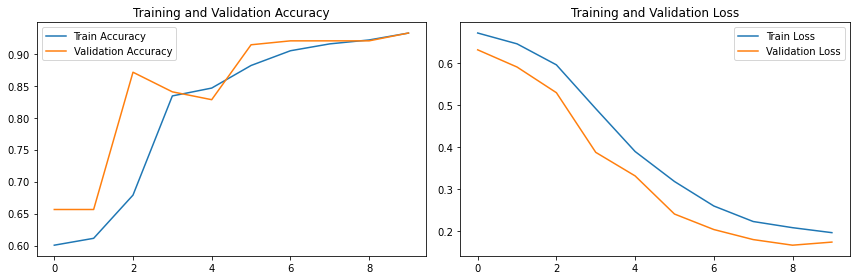

In [14]:
# Plotting training accuracy and loss
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Evaluating the model
y_pred = model.predict(X_test)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 36ms/step
[[ 46  10]
 [  1 106]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89        56
           1       0.91      0.99      0.95       107

    accuracy                           0.93       163
   macro avg       0.95      0.91      0.92       163
weighted avg       0.94      0.93      0.93       163



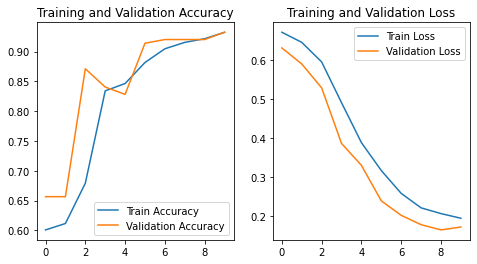

In [16]:
# Plotting training accuracy and loss
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

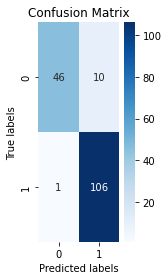

In [17]:
# Plotting confusion matrix using seaborn
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

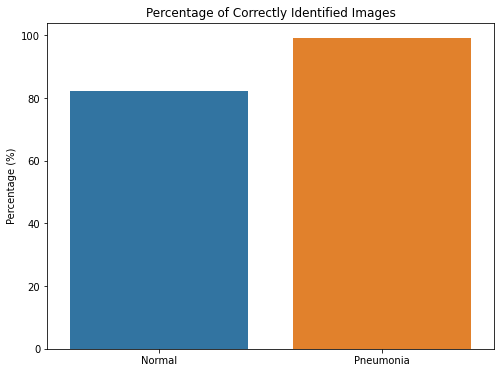

In [18]:
# Bar graph comparing percentages of correctly identified normal and pneumonia images
correctly_identified = [cm[i][i] for i in range(2)]
labels = ['Normal', 'Pneumonia']
percentages = [(i / sum(cm[j]) * 100) for j, i in enumerate(correctly_identified)]

plt.figure(figsize=(8,6))
sns.barplot(x=labels, y=percentages)
plt.ylabel('Percentage (%)')
plt.title('Percentage of Correctly Identified Images')
plt.show()

----------------------------------------------------------------